# Employee Database

### Here are two approaches to creating Pandas Dataframes using SQL

#### (1) Creating Pandas Dataframes using read_sql

In [5]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

In [6]:
# Create engine to import SQL into Pandas
engine = create_engine('postgresql://postgres: @localhost:5432/employee_db')
connection = engine.connect()

In [7]:
# Create Pandas Dataframes using SQL statements
salaries = pd.read_sql('SELECT * FROM salaries', connection)
titles = pd.read_sql('SELECT * FROM "titles"', connection)

# Merge both Dataframes based on emp_no
full_df = pd.merge(titles,salaries,on='emp_no',how='inner')

In [8]:
# Create a copy of the Dataframe for data manipulation
clean_df = full_df.copy()
# Select only the title and salary column
clean_df = clean_df[['title','salary']]
# Use Groupby on title and get the average salary per title
grouped_df = clean_df.groupby('title').mean()

Text(0, 0.5, 'Salaries in Dollars')

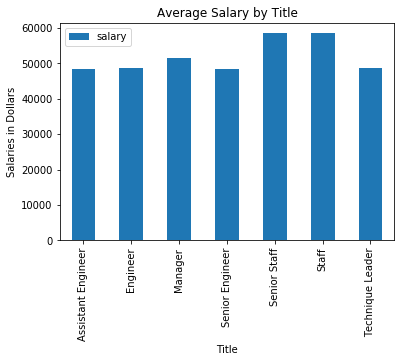

In [22]:
# Create a bar plot
grouped_df.plot.bar()
plt.title('Average Salary by Title')
plt.xlabel('Title')
plt.ylabel('Salaries in Dollars')

#### (2) Creating Pandas Dataframes using SQLAlchemy with automap and orm

In [11]:
# Import SQLAlchemy `automap` and other dependencies here
import pandas as pd
import matplotlib.pyplot as plt
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine

In [12]:
# Create engine to import SQL into Pandas
engine = create_engine('postgresql://postgres: @localhost:5432/employee_db')
connection = engine.connect()

In [13]:
# Declare a Base using `automap_base()`
Base = automap_base()
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)
# Assign the salaries and titles class to variables
Salaries = Base.classes.salaries
Titles = Base.classes.titles

In [14]:
# Start a session to query the database
session = Session(engine)

In [15]:
# Create a SQL query statement that joins the Salaries and Titles objects on emp_no
stmt = session.query(Salaries,Titles).filter(Salaries.emp_no == Titles.emp_no).statement
# Create a Pandas Dataframe using read_sql_query
full_df2 = pd.read_sql_query(stmt, session.bind)
# Create a copy of the Dataframe for data manipulation
clean_df2 = full_df2.copy()
# Select only the title and salary column
clean_df2 = clean_df2[['title','salary']]
# Use Groupby on title and get the average salary per title
grouped_df2 = clean_df2.groupby('title').mean()

Text(0, 0.5, 'Salaries in Dollars')

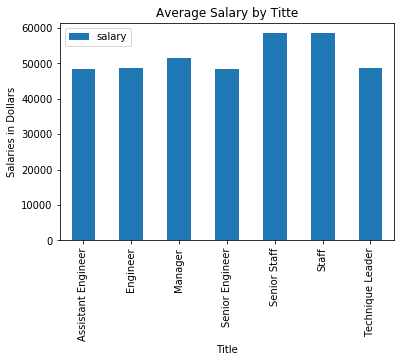

In [26]:
# Create a bar plot
grouped_df2.plot(kind='bar')
plt.title('Average Salary by Titte')
plt.xlabel('Title')
plt.ylabel('Salaries in Dollars')

## Technical Report

In order to correctly create the table schema, it was imperative to know what columns each table contained. By knowing the columns, it was easier to identify what would be the primary key and the foreign key in each table. There were two main columns that were part of the majority of tables, emp_no and dept_no. In fact, for emp_no, the only table that did not include this column was 'departments'. 


The next step was to see what tables had emp_no or dept_no as unique values, in order to determine they could be used as primary keys in certain tables. Of the tables with the emp_no column, the following tables had unique emp_no values: 'employees', 'salaries', and 'dept_manager'. Since the 'employees' table contained the most information, emp_no in the 'employees' table was chosen as the primary key. The emp_no column in 'salaries','titles','dept_emp' and 'dept_manager' was then chosen as the foreign key in those tables so that it can relate back to the primary key in 'employees'. For 'titles' and 'dept_emp', there is a one-to-many relationship between the primary key and foreign key. For 'salaries' and 'dept_manager', since emp_no is unique for these tables, there is a one-to-one relationship between the primary key and foreign key. Because emp_no was used as the foreign key for the 'salaries' and the 'titles' table, id SERIAL was used as the primary key so that each row in the table remain unique. Since 'dept_emp' and 'dept_manager' have the dept_no column, further investigation needs to occur to see if that is the primary key for either of those tables.


For dept_no, the only table that had unique values was 'departments' and therefore, dept_no became the primary key in that table. For the other two tables that had dept_no columns, 'dept_emp' and 'dept_manager', dept_no became the foreign key.In both instances, it had a one-to-many relationship between the primary key in 'departments' since dept_no was not unique in either of the two tables. Since neither emp_no or dept_no were primary keys in 'dept_emp' and 'dept_manager', id SERIAL was used as the primary key in order to create unique rows for each table.


Once the table schema was completed, the CSV files needed to be imported. Since the 'employees' and the 'departments' tables had primary keys that were used as foreign keys for other tables, they needed to be imported first. Following this step, all other tables could be imported. It is important to note that when importing tables with generated IDs (i.e. those that used id SERIAL as their primary key), the id column must be unselected when choosing the columns to import. This is because this column does not exist in the original table. Once removed, SQL will automatically generate sequential ids starting at 1.